In [6]:
from Bib.Wärmeerzeuger import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn")

### Randbedingungen

In [7]:
Energiepreissteigerung = 1.03 # 3% Energiepreissteigerung pro Jahr
Heiwärmebedarf = 6000 # Heizung Endenergiebedarf
TWW_Bedarf = 3000 # Warmwasser Endenergiebedarf
Wartungskosten = 0.015 # 1,5 % Wartungskosten pro Jahr
# PV_______________________________________________________________________________
Stromertrag_PV = 4000 # Eine ca. 4 kWp-Anlage
Eigennutzungsgrad_PV = 0.3 # 30% des erzeugten Stroms werden selbst genutzt. Der Rest wird verkauft.
Investkosten_PV = 4600 # für 4 kWp
#__________________________________________________________________________________
Anfangsstrompreis = 0.30 # 30 Cent pro kWh Strom
Anfangsgaspreis = 0.06 # 6 Cent pro kWh Gas
Anfangspelletpreis = 0.05 # 5 Cent pro kWh Pellets
CO2_Strom_GEG = 560 # Laut GEG gibt es 560 g CO2-Emissionen pro kWh Stromverbrauch. Real ist es weniger
CO2_Gas_GEG = 240 # Laut GEG gibt es 240 g CO2-Emissionen pro kWh Gasverbrauch
CO2_Holz_GEG = 20 # Laut GEG gibt es 20 g CO2-Emissionen pro kWh Holz

Investkosten_Pelletkessel = 14000 # Anschaffungspreis des Pellet-Kessels
# Die ersten Werte der CO2 Steuer bis 55 sind fix geplant so. Der Rest ist eine Annahme
# CO2_Steuer = [25,30,35,45,55,65,75,77,79,81,79,77,75,75,74] # In € pro Tonne für 15 Jahre Variante billig
CO2_Steuer = [25,30,35,45,55,65,75,85,95,105,115,125,135,145,155] # In € pro Tonne für 15 Jahre Variante teuer
# Ich nehme an, dass der erneuerbare Anteil am Stromnetz um 2% pro Jahr steigt
Strommix_Erneuerbar = np.arange(45,75,2) # Findet keine Verwendung derzeit
# Ich nehme an, dass der reale CO2-Ausstoß pro kWh Strom jährlich um 5% sinkt:
CO2_Strom_real = [475] # 475 ist in g CO2/kWh 
for i in range(14):
    CO2_Strom_real.append(CO2_Strom_real[i]*0.95) 
Allgemeines = allgemeines(CO2_Steuer,Strommix_Erneuerbar,CO2_Strom_GEG,CO2_Strom_real,CO2_Gas_GEG, 
                          Anfangsstrompreis,Energiepreissteigerung,Anfangsgaspreis,Anfangspelletpreis)

### Luft-Wasser-Wärmepumpe
- Für die Jahres Arbeitszahl für die Luft-Wasser-Wärmepumpe wird hier 3,5 angenommen
- Anschaffungspreis der Luft-Wasser-Wärmepumpe wird mit 6.000 € angenommen

In [8]:
LWWP = Wärmepumpe(Heiwärmebedarf=Heiwärmebedarf,
                  TWW_Bedarf=TWW_Bedarf, 
                  Strompreis= Allgemeines["Strompreis"],
                  JAZ=3.5, 
                  Investkosten=6000,
                  Wartungskosten=Wartungskosten, 
                  CO2_Strom_real=Allgemeines["CO2_Strom_real"], 
                  CO2_Strom_GEG=Allgemeines["CO2_Strom_GEG"],
                  CO2_Steuer=Allgemeines["CO2_Steuer"
                                        ])

### Sole-Wasser-Wärmepumpe
- Für die Jahres Arbeitszahl für die Sole-Wasser-Wärmepumpe wird hier 4,5 angenommen
- Anschaffungspreis der Luft-Wasser-Wärmepumpe wird mit 16.500 € angenommen

In [9]:
SWWP = Wärmepumpe(Heiwärmebedarf=Heiwärmebedarf,
                  TWW_Bedarf=TWW_Bedarf, 
                  Strompreis=Allgemeines["Strompreis"],
                  JAZ=4.5, 
                  Investkosten=16500,
                  Wartungskosten=Wartungskosten, 
                  CO2_Strom_real=Allgemeines["CO2_Strom_real"], 
                  CO2_Strom_GEG=Allgemeines["CO2_Strom_GEG"],
                  CO2_Steuer=Allgemeines["CO2_Steuer"
                             ])

### Gas-Brennwert
- Anschaffungspreis des Brennwert-Geräts wird mit 4.500 € angenommen

In [10]:
Gasbrennwert = Brennwert(Heiwärmebedarf=Heiwärmebedarf,
                         TWW_Bedarf=TWW_Bedarf, 
                         Gaspreis=Allgemeines["Gaspreis"],
                         Investkosten=4500, 
                         Wartungskosten=Wartungskosten, 
                         CO2_Gas=Allgemeines['CO2_Gas'], 
                         CO2_Steuer=Allgemeines["CO2_Steuer"
                                    ])

### Gas-Brennwert mit solarer Warmwasserbereitung
- Anschaffungspreis des Brennwert-Geräts wird mit 4.500 € angenommen
- Anschaffungspreis der Solarthermieanlage wird mit 2.500 € angenommen
- Die Solarthermieanlage deckt 50% des TWW's
- Die Darstellung ist sehr vereinfach. Es wird hier kein Pumpenstrom und keine Wartungskosten der Solarthermieanlage angesetzt. Der CO2 Ausstoß der Solarthermie ist vereinfacht null

In [21]:
Brennwert_Sol = Brennwert_Solar(Heiwärmebedarf=Heiwärmebedarf,
                         TWW_Bedarf=TWW_Bedarf, 
                         Gaspreis=Allgemeines["Gaspreis"],
                         Investkosten=4500+2500, 
                         Wartungskosten=Wartungskosten, 
                         CO2_Gas=Allgemeines['CO2_Gas'], 
                         CO2_Steuer=Allgemeines["CO2_Steuer"])

### Luft-Wasser-Wärmepumpe mit Photovoltaik
- Für die Jahres Arbeitszahl für die Luft-Wasser-Wärmepumpe wird hier 3,5 angenommen
- Anschaffungspreis der Luft-Wasser-Wärmepumpe wird mit 6.000 € angenommen
- Es wird von einer 4 kWp Anlage mit 4.000 kWh Jahresertrag ausgegangen
- Die Investkosten der PV-Anlage werden mit 4.600 € angenommen
- Es wird von einem Autarkiegrad von 30 % ausgegangen

In [12]:
LWWP_PV =  PV_ergänzen(Wärmeerzeuger=LWWP, 
                       Allgemeines=Allgemeines, 
                       Stromertrag_PV=4000, 
                       Eigennutzungsgrad_PV=0.3,
                       Investkosten=6000, 
                       Investkosten_PV=4600,
                       Wartungskosten=Wartungskosten,
                       CO2_Steuer=Allgemeines["CO2_Steuer"
                                  ])

### Sole-Wasser-Wärmepumpe mit Photovoltaik
- Für die Jahres Arbeitszahl für die Sole-Wasser-Wärmepumpe wird hier 4,5 angenommen
- Anschaffungspreis der Luft-Wasser-Wärmepumpe wird mit 16.500 € angenommen
- Es wird von einer 4 kWp Anlage mit 4.000 kWh Jahresertrag ausgegangen
- Die Investkosten der PV-Anlage werden mit 4.600 € angenommen
- Es wird von einem Autarkiegrad von 30 % ausgegangen

In [13]:
SWWP_PV =  PV_ergänzen(Wärmeerzeuger=SWWP, 
                       Allgemeines=Allgemeines, 
                       Stromertrag_PV=4000, 
                       Eigennutzungsgrad_PV=0.3,
                       Investkosten=16500, 
                       Investkosten_PV=4600,
                       Wartungskosten=Wartungskosten,
                       CO2_Steuer=Allgemeines["CO2_Steuer"])

## Visualisierung laufende und Investkosten

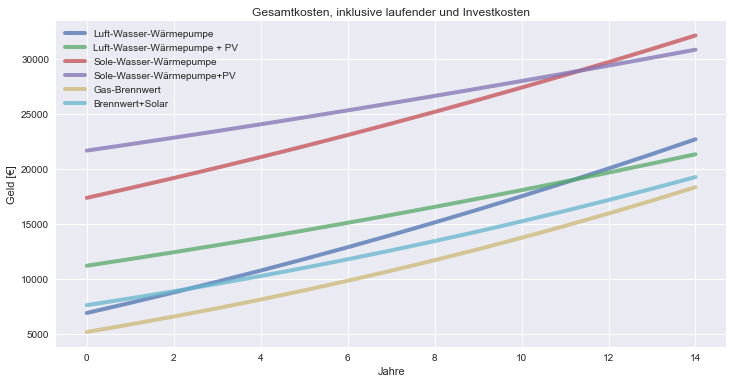

In [14]:
plt.figure (figsize=(12,6), facecolor="white", edgecolor="black")
LWWP["Gesamtkosten"].plot(label= "Luft-Wasser-Wärmepumpe", lw=4, ls="-", alpha=0.75)
LWWP_PV["Gesamtkosten"].plot(label="Luft-Wasser-Wärmepumpe + PV", lw=4, ls="-", alpha=0.75)
SWWP["Gesamtkosten"].plot(label= "Sole-Wasser-Wärmepumpe", lw=4, ls="-", alpha=0.75)
SWWP_PV["Gesamtkosten"].plot(label= "Sole-Wasser-Wärmepumpe+PV", lw=4, ls="-", alpha=0.75)
Gasbrennwert["Gesamtkosten"].plot(label= "Gas-Brennwert", lw=4, ls="-", alpha=0.75)
Brennwert_Sol["Gesamtkosten"].plot(label= "Brennwert+Solar", lw=4, ls="-", alpha=0.75)
plt.legend(loc='upper left')
plt.ylabel("Geld [€]")
plt.xlabel("Jahre")
plt.title("Gesamtkosten, inklusive laufender und Investkosten")
plt.show()

## Visualisierung CO2-Emissionen

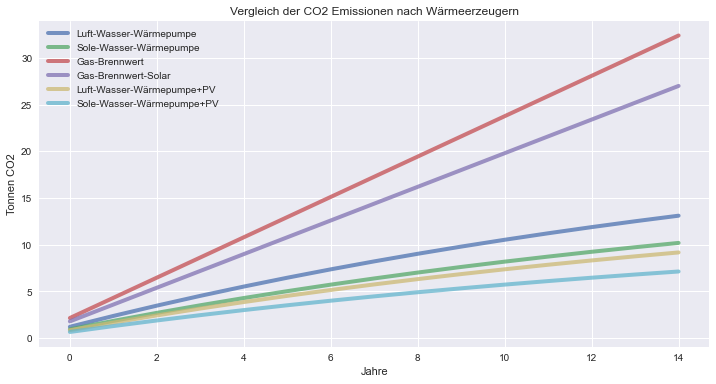

In [22]:
plt.figure (figsize=(12,6), facecolor="white", edgecolor="black")
LWWP["CO2_Ausstoss_Gesamt"].plot(label= "Luft-Wasser-Wärmepumpe", lw=4, ls="-", alpha=0.75)
SWWP["CO2_Ausstoss_Gesamt"].plot(label= "Sole-Wasser-Wärmepumpe", lw=4, ls="-", alpha=0.75)
Gasbrennwert["CO2_Ausstoss_Gesamt"].plot(label= "Gas-Brennwert", lw=4, ls="-", alpha=0.75)
Brennwert_Sol["CO2_Ausstoss_Gesamt"].plot(label= "Gas-Brennwert-Solar", lw=4, ls="-", alpha=0.75)
LWWP_PV["CO2_Ausstoss_Gesamt"].plot(label= "Luft-Wasser-Wärmepumpe+PV", lw=4, ls="-", alpha=0.75)
SWWP_PV["CO2_Ausstoss_Gesamt"].plot(label= "Sole-Wasser-Wärmepumpe+PV", lw=4, ls="-", alpha=0.75)
plt.xlabel("Jahre")
plt.ylabel("Tonnen CO2")
plt.legend(loc='upper left')
plt.title("Vergleich der CO2 Emissionen nach Wärmeerzeugern") 
plt.show()

## Visualisierung laufende Kosten

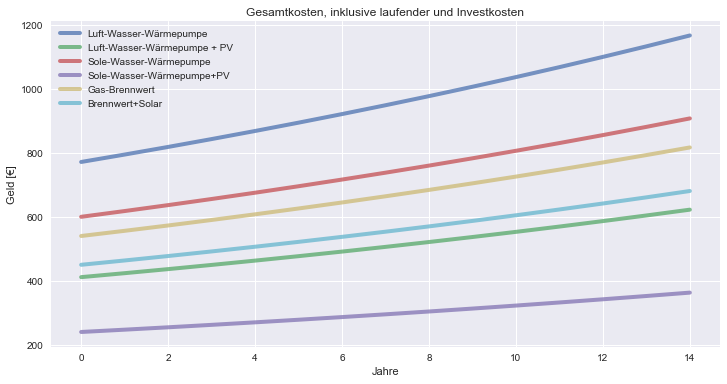

In [16]:
plt.figure (figsize=(12,6), facecolor="white", edgecolor="black")
LWWP["Energiekosten"].plot(label= "Luft-Wasser-Wärmepumpe", lw=4, ls="-", alpha=0.75)
LWWP_PV["Energiekosten"].plot(label="Luft-Wasser-Wärmepumpe + PV", lw=4, ls="-", alpha=0.75)
SWWP["Energiekosten"].plot(label= "Sole-Wasser-Wärmepumpe", lw=4, ls="-", alpha=0.75)
SWWP_PV["Energiekosten"].plot(label= "Sole-Wasser-Wärmepumpe+PV", lw=4, ls="-", alpha=0.75)
Gasbrennwert["Energiekosten"].plot(label= "Gas-Brennwert", lw=4, ls="-", alpha=0.75)
Brennwert_Sol["Energiekosten"].plot(label= "Brennwert+Solar", lw=4, ls="-", alpha=0.75)
plt.legend(loc='upper left')
plt.ylabel("Geld [€]")
plt.xlabel("Jahre")
plt.title("Gesamtkosten, inklusive laufender und Investkosten")
plt.show()